In [3]:
import torch
#--matplotlib
import matplotlib
from matplotlib.lines import Line2D
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rc('text',usetex=True)
import pylab as py
from matplotlib import colors
import matplotlib.gridspec as gridspec


In [4]:
torch.set_default_dtype(torch.float64)

In [5]:
# Xs = 10**torch.linspace(-3,-1.001,100)
# Xs = torch.cat((Xs,torch.linspace(0.1,1,100)))
Xs = torch.linspace(0,1,100)
Vs = torch.exp(-Xs)

In [6]:
Xs,Vs

(tensor([0.0000, 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707, 0.0808,
         0.0909, 0.1010, 0.1111, 0.1212, 0.1313, 0.1414, 0.1515, 0.1616, 0.1717,
         0.1818, 0.1919, 0.2020, 0.2121, 0.2222, 0.2323, 0.2424, 0.2525, 0.2626,
         0.2727, 0.2828, 0.2929, 0.3030, 0.3131, 0.3232, 0.3333, 0.3434, 0.3535,
         0.3636, 0.3737, 0.3838, 0.3939, 0.4040, 0.4141, 0.4242, 0.4343, 0.4444,
         0.4545, 0.4646, 0.4747, 0.4848, 0.4949, 0.5051, 0.5152, 0.5253, 0.5354,
         0.5455, 0.5556, 0.5657, 0.5758, 0.5859, 0.5960, 0.6061, 0.6162, 0.6263,
         0.6364, 0.6465, 0.6566, 0.6667, 0.6768, 0.6869, 0.6970, 0.7071, 0.7172,
         0.7273, 0.7374, 0.7475, 0.7576, 0.7677, 0.7778, 0.7879, 0.7980, 0.8081,
         0.8182, 0.8283, 0.8384, 0.8485, 0.8586, 0.8687, 0.8788, 0.8889, 0.8990,
         0.9091, 0.9192, 0.9293, 0.9394, 0.9495, 0.9596, 0.9697, 0.9798, 0.9899,
         1.0000]),
 tensor([1.0000, 0.9899, 0.9800, 0.9702, 0.9604, 0.9507, 0.9412, 0.9317, 0.9224,
         

In [7]:
deltas = torch.empty((Vs.shape[0]+3,))

In [8]:
deltas[2:-2] = (Vs[1:] - Vs[:-1]) / (Xs[1:] - Xs[:-1])

In [9]:
deltas[1] = 2 * deltas[2] - deltas[3]
deltas[0] = 2 * deltas[1] - deltas[2]

deltas[-2] = 2 * deltas[-3] - deltas[-4]
deltas[-1] = 2 * deltas[-2] - deltas[-3]

In [10]:
deltas

tensor([-1.0150, -1.0050, -0.9950, -0.9850, -0.9751, -0.9653, -0.9556, -0.9460,
        -0.9365, -0.9270, -0.9177, -0.9085, -0.8994, -0.8903, -0.8814, -0.8725,
        -0.8638, -0.8551, -0.8465, -0.8380, -0.8296, -0.8212, -0.8130, -0.8048,
        -0.7967, -0.7887, -0.7808, -0.7729, -0.7652, -0.7575, -0.7499, -0.7423,
        -0.7349, -0.7275, -0.7202, -0.7129, -0.7058, -0.6987, -0.6916, -0.6847,
        -0.6778, -0.6710, -0.6643, -0.6576, -0.6510, -0.6444, -0.6380, -0.6315,
        -0.6252, -0.6189, -0.6127, -0.6065, -0.6004, -0.5944, -0.5884, -0.5825,
        -0.5767, -0.5709, -0.5651, -0.5594, -0.5538, -0.5483, -0.5427, -0.5373,
        -0.5319, -0.5265, -0.5213, -0.5160, -0.5108, -0.5057, -0.5006, -0.4956,
        -0.4906, -0.4857, -0.4808, -0.4760, -0.4712, -0.4664, -0.4618, -0.4571,
        -0.4525, -0.4480, -0.4435, -0.4390, -0.4346, -0.4302, -0.4259, -0.4216,
        -0.4174, -0.4132, -0.4090, -0.4049, -0.4009, -0.3968, -0.3928, -0.3889,
        -0.3850, -0.3811, -0.3773, -0.37

In [11]:
deltas[-3] - deltas[-4]

tensor(0.0038)

In [12]:
w1s = torch.abs(deltas[3:]-deltas[2:-1])
w1s.shape

torch.Size([100])

In [13]:
w1s[-1]

tensor(0.0038)

In [14]:
w2s = torch.abs(deltas[1:-2] - deltas[:-3])

In [15]:
w2s.shape

torch.Size([100])

In [16]:
w2s[-1]

tensor(0.0038)

In [17]:
deltas[:-1]

tensor([-1.0150, -1.0050, -0.9950, -0.9850, -0.9751, -0.9653, -0.9556, -0.9460,
        -0.9365, -0.9270, -0.9177, -0.9085, -0.8994, -0.8903, -0.8814, -0.8725,
        -0.8638, -0.8551, -0.8465, -0.8380, -0.8296, -0.8212, -0.8130, -0.8048,
        -0.7967, -0.7887, -0.7808, -0.7729, -0.7652, -0.7575, -0.7499, -0.7423,
        -0.7349, -0.7275, -0.7202, -0.7129, -0.7058, -0.6987, -0.6916, -0.6847,
        -0.6778, -0.6710, -0.6643, -0.6576, -0.6510, -0.6444, -0.6380, -0.6315,
        -0.6252, -0.6189, -0.6127, -0.6065, -0.6004, -0.5944, -0.5884, -0.5825,
        -0.5767, -0.5709, -0.5651, -0.5594, -0.5538, -0.5483, -0.5427, -0.5373,
        -0.5319, -0.5265, -0.5213, -0.5160, -0.5108, -0.5057, -0.5006, -0.4956,
        -0.4906, -0.4857, -0.4808, -0.4760, -0.4712, -0.4664, -0.4618, -0.4571,
        -0.4525, -0.4480, -0.4435, -0.4390, -0.4346, -0.4302, -0.4259, -0.4216,
        -0.4174, -0.4132, -0.4090, -0.4049, -0.4009, -0.3968, -0.3928, -0.3889,
        -0.3850, -0.3811, -0.3773, -0.37

In [18]:
w1s[0]

tensor(0.0100)

In [19]:
deltas[2]-deltas[1]

tensor(0.0100)

In [20]:
ds = w1s / (w1s + w2s) * deltas[1:-2] + w2s / (w1s + w2s) * deltas[2:-1]

In [21]:
ds

tensor([-1.0000, -0.9899, -0.9800, -0.9701, -0.9604, -0.9507, -0.9412, -0.9317,
        -0.9223, -0.9131, -0.9039, -0.8948, -0.8858, -0.8769, -0.8681, -0.8594,
        -0.8507, -0.8422, -0.8337, -0.8253, -0.8171, -0.8088, -0.8007, -0.7927,
        -0.7847, -0.7768, -0.7690, -0.7613, -0.7536, -0.7460, -0.7386, -0.7311,
        -0.7238, -0.7165, -0.7093, -0.7022, -0.6951, -0.6881, -0.6812, -0.6744,
        -0.6676, -0.6609, -0.6542, -0.6477, -0.6412, -0.6347, -0.6283, -0.6220,
        -0.6158, -0.6096, -0.6035, -0.5974, -0.5914, -0.5854, -0.5796, -0.5737,
        -0.5680, -0.5623, -0.5566, -0.5510, -0.5455, -0.5400, -0.5346, -0.5292,
        -0.5239, -0.5186, -0.5134, -0.5082, -0.5031, -0.4981, -0.4931, -0.4881,
        -0.4832, -0.4784, -0.4735, -0.4688, -0.4641, -0.4594, -0.4548, -0.4502,
        -0.4457, -0.4412, -0.4368, -0.4324, -0.4280, -0.4237, -0.4195, -0.4153,
        -0.4111, -0.4070, -0.4029, -0.3988, -0.3948, -0.3909, -0.3869, -0.3830,
        -0.3792, -0.3754, -0.3716, -0.36

In [22]:
hs = Xs[1:] - Xs[:-1]

In [23]:
def locate(x,Xs):
    """
    x is a tensor of points to interpolate to
    Xs is the grid

    We should add a failsafe here for x outside the range
    """
    idx = torch.searchsorted(Xs,x) - 1
    return idx,idx+1

In [27]:
#ks,ksp1 = locate(torch.tensor([1.1]),Xs)#.shape

In [29]:
#Xs[ks],Xs[ksp1]
#locate(1,Xs)

In [30]:
def P(x,Xs,vs,ds):
    x = torch.clamp(x, Xs[0], Xs[-1])
    
    k,kp1 = locate(x,Xs)
    
    #s = x - Xs[k]
    h = Xs[kp1] - Xs[k]
    theta = (x - Xs[k]) / h

    #term1 = (3 * h * s**2 - 2 * s**3) / h**3 * vs[kp1]
    mult1 = (3 * theta**2 - 2 * theta**3)
    term1 = mult1 * vs[kp1]
    #term2 = (h**3 - 3 * h * s**2 + 2 * s**3) / h**3 * vs[k]
    term2 = (1 - mult1) * vs[k]
    #term3 = (s**2 * (s - h)) / h**2 * ds[kp1]
    term3 = (theta**2 * h * (theta - 1) ) * ds[kp1]
    #term4 = (s * (s - h)**2) / h**2 * ds[k]
    term4 = (theta * h * (theta - 1)**2 ) * ds[k]
    return term1 + term2 + term3 + term4

In [31]:

xrand = 1e-3 + torch.rand(25) * (1 - 1e-3)

int_vals = P(xrand,Xs,Vs,ds)
tru_vals = torch.exp(-xrand)



Text(0, 0.5, '$\\rm rel.~diff.$')

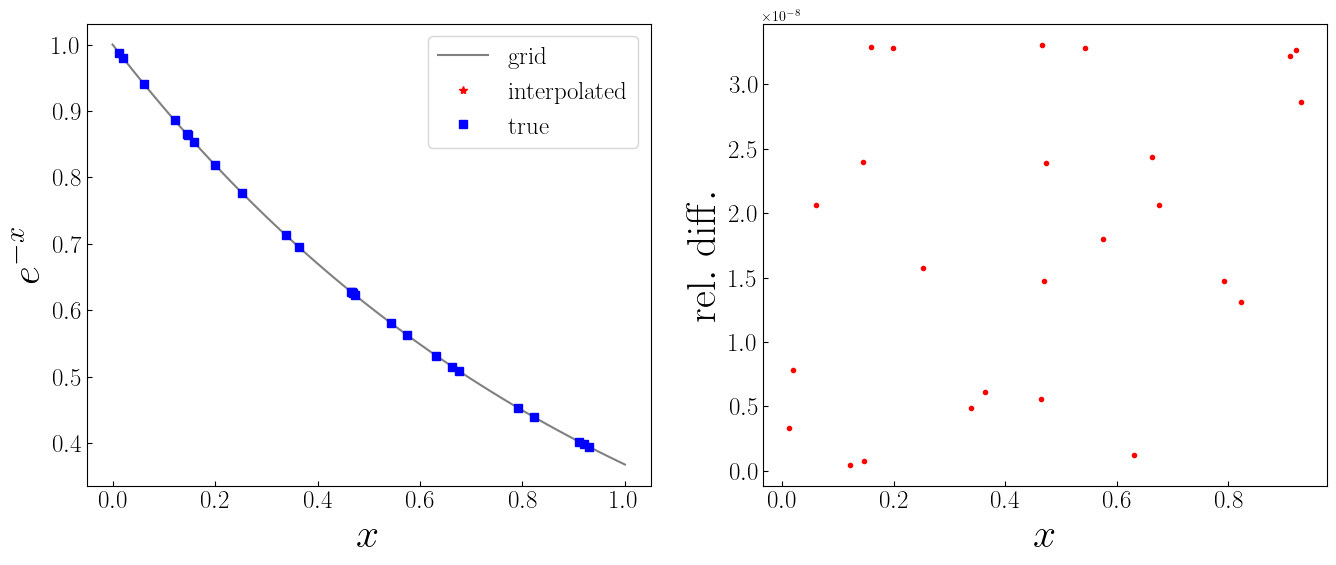

In [306]:
nrows,ncols = 1,2
py.figure(figsize=(8*ncols,6*nrows))

ax=py.subplot(nrows,ncols,1)
ax.plot(Xs,Vs,'gray',label=r'$\rm grid$')
ax.plot(xrand,int_vals,'r*',label=r'$\rm interpolated$')
ax.plot(xrand,tru_vals,'bs',label=r'$\rm true$')

ax.tick_params(direction='in',labelsize=18)
ax.legend(fontsize=18)
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$e^{-x}$',size=30)

ax=py.subplot(nrows,ncols,2)
ax.plot(xrand,torch.abs(int_vals-tru_vals)/tru_vals,'r.')
# ax.semilogx()
# ax.semilogy()

ax.tick_params(direction='in',labelsize=18)
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$\rm rel.~diff.$',size=30)

In [57]:
xrand[torch.max(torch.abs(int_vals-tru_vals)/tru_vals) == (torch.abs(int_vals-tru_vals)/tru_vals)]

tensor([0.0729])

In [368]:
def modified_akima_2D(x, y, z_grid, x_grid, y_grid):
    ###Assume z_grid is x by y
    delta_x = torch.empty((z_grid.shape[0]+3,z_grid.shape[1]))
    delta_x[2:-2] = (z_grid[1:] - z_grid[:-1]) / (x_grid[1:,None] - x_grid[:-1,None])
    delta_x[1] = 2 * delta_x[2] - delta_x[3]
    delta_x[0] = 2 * delta_x[1] - delta_x[2]
    delta_x[-2] = 2 * delta_x[-3] - delta_x[-4]
    delta_x[-1] = 2 * delta_x[-2] - delta_x[-3]

    delta_y = torch.empty((z_grid.shape[0],z_grid.shape[1]+3))
    delta_y[:,2:-2] = (z_grid[:,1:] - z_grid[:,:-1]) / (y_grid[None,1:] - y_grid[None,:-1])
    delta_y[:,1] = 2 * delta_y[:,2] - delta_y[:,3]
    delta_y[:,0] = 2 * delta_y[:,1] - delta_y[:,2]
    delta_y[:,-2] = 2 * delta_y[:,-3] - delta_y[:,-4]
    delta_y[:,-1] = 2 * delta_y[:,-2] - delta_y[:,-3]

    delta_xy = torch.empty((delta_x.shape[0], delta_y.shape[1]))
    delta_xy[:,2:-2] = (delta_x[:,1:] - delta_x[:,:-1]) / (y_grid[None,1:] - y_grid[None, :-1])
    delta_xy[:,1] = 2 * delta_xy[:,2] - delta_xy[:,3]
    delta_xy[:,0] = 2 * delta_xy[:,1] - delta_xy[:,2]
    delta_xy[:,-2] = 2 * delta_xy[:,-3] - delta_xy[:,-4]
    delta_xy[:,-1] = 2 * delta_xy[:,-2] - delta_xy[:,-3]

    w1_x = torch.abs(delta_x[3:] - delta_x[2:-1]) + torch.abs(delta_x[3:] + delta_x[2:-1]) / 2
    w2_x = torch.abs(delta_x[1:-2] - delta_x[:-3]) + torch.abs(delta_x[1:-2] + delta_x[:-3]) / 2

    d_x = (w1_x * delta_x[1:-2] + w2_x * delta_x[2:-1]) / (w1_x + w2_x)
    
    w1_y = torch.abs(delta_y[:,3:] - delta_y[:,2:-1]) + torch.abs(delta_y[:,3:] + delta_y[:,2:-1]) / 2
    w2_y = torch.abs(delta_y[:,1:-2] - delta_y[:,:-3]) + torch.abs(delta_y[:,1:-2] + delta_y[:,:-3]) / 2

    d_y = (w1_y * delta_y[:,1:-2] + w2_y * delta_y[:,2:-1]) / (w1_y + w2_y)

    d_xy = ( (w1_x * (w1_y * delta_xy[1:-2,1:-2] + w2_y * delta_xy[1:-2,2:-1]) + 
              w2_x * (w1_y * delta_xy[2:-1,1:-2] + w2_y * delta_xy[2:-1,2:-1])) / 
              ((w1_x + w2_x) * (w1_y + w2_y)) )

    ### Modified Akima sets NaN values (from cases where data is constant for more than two nodes) to 0.
    ### This change prevents overshoot in that range
    d_x = torch.nan_to_num(d_x)
    d_y = torch.nan_to_num(d_y)
    d_xy = torch.nan_to_num(d_xy)
    #print(d_x)
    #print(d_y)
    #print(d_xy)

    ### torch.clamp handles x-values outisde boundaries ( x< x_min -> x_min, x>x_max -> x_max ) 
    x = torch.clamp(x, x_grid[0], x_grid[-1])
    y = torch.clamp(y, y_grid[0], y_grid[-1])

    ### locate returns the indices of the left and right nearest points
    xk, xkp1 = locate(x, x_grid)
    xk = xk[:,None]
    xkp1 = xkp1[:,None]
    yk, ykp1 = locate(y, y_grid)
    
    ### h_ is the separation between the two nearest nodes
    ### theta_ is how far the interpolated point in from the left node relative to h_
    h_x = x_grid[xkp1] - x_grid[xk]
    h_y = y_grid[ykp1] - y_grid[yk]
    h_xy = h_x * h_y
    
    theta_x = (x - x_grid[xk][:,0]) / h_x[:,0]
    theta_y = (y - y_grid[yk]) / h_y

    theta_y = torch.nan_to_num(theta_y)
    
    base_mat = torch.tensor([ [1.,0.,-3.,2.], [0.,0.,3.,-2.], [0.,1.,-2.,1.], [0.,0.,-1.,1.] ])
    coeff_mat = torch.stack([torch.stack([z_grid[xk,yk], z_grid[xk, ykp1], h_y * d_y[xk,yk], h_y * d_y[xk,ykp1]],axis=-1),
                              torch.stack([z_grid[xkp1,yk], z_grid[xkp1, ykp1], h_y * d_y[xkp1,yk], h_y * d_y[xkp1,ykp1]],axis=-1),
                              torch.stack([h_x * d_x[xk,yk], h_x * d_x[xk,ykp1], h_xy * d_xy[xk,yk], h_xy * d_xy[xk,ykp1]],axis=-1),
                              torch.stack([h_x * d_x[xkp1,yk], h_x * d_x[xkp1,ykp1], h_xy * d_xy[xkp1,yk], h_xy * d_xy[xkp1,ykp1]],axis=-1)
                             ], axis=-2)
    
    theta_x_vec = torch.stack([torch.ones(theta_x.shape), theta_x, theta_x**2, theta_x**3],axis=-1)
    theta_y_vec = torch.stack([torch.ones(theta_y.shape), theta_y, theta_y**2, theta_y**3],axis=-1)
    
    M1 = torch.matmul(base_mat,coeff_mat)
    M2 = torch.matmul(base_mat.T[None,None], theta_y_vec[None,:,:,None])
    M3 = torch.matmul(M1, M2)
    
    return torch.matmul(theta_x_vec[:,None,None,:], M3).squeeze()

In [369]:
x_vals = torch.linspace(1e-4,1,150)
bT_vals_lin = torch.linspace(1e-3,10,100)
bT_vals_log = torch.logspace(-3, 1, 100)

In [370]:
ff1_bt = lambda bT : torch.special.scaled_modified_bessel_k0(bT)*torch.exp(-bT)
ff2_bt = lambda bT, a=1 : (1/(a**2))*torch.exp(-bT**2/(2*a**2))
def ff3_bt(bT,x,a=1):
    r = (torch.tanh(-0.08*(bT-0.6)+1)/2)
    return (r*bT*ff1_bt(bT) + (1-r)*bT*ff2_bt(bT,a))

def ff3_bt_x(x,bT,a=1):
    x_func = x**(-0.5) * (1-x)**3
    return x_func *ff3_bt(bT,x,a)

In [374]:
#func_grid=ff3_bt_x(x_vals[:,None],torch.tensor([1])) #bT_vals_lin)
func_grid=ff3_bt_x(x_vals[:,None],bT_vals_lin)
print(func_grid)
modified_akima_2D(x_vals[0][None], bT_vals_lin[-1][None], func_grid, x_vals, bT_vals_lin)

tensor([[3.3512e-01, 1.5747e+01, 2.5845e+01,  ..., 2.7790e-03, 2.4514e-03,
         2.1600e-03],
        [3.9795e-02, 1.8699e+00, 3.0690e+00,  ..., 3.3001e-04, 2.9110e-04,
         2.5649e-04],
        [2.7675e-02, 1.3004e+00, 2.1343e+00,  ..., 2.2950e-04, 2.0244e-04,
         1.7837e-04],
        ...,
        [8.1596e-09, 3.8340e-07, 6.2927e-07,  ..., 6.7664e-11, 5.9686e-11,
         5.2591e-11],
        [1.0165e-09, 4.7763e-08, 7.8393e-08,  ..., 8.4294e-12, 7.4355e-12,
         6.5516e-12],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


tensor(1.6972)

In [360]:
#bT_rand = bT_vals_lin[0] + torch.rand(25) * (bT_vals_lin[-1] - bT_vals_lin[0])
x_rand = torch.rand(25)
akima_vals=modified_akima_2D(x_rand, torch.tensor([1]), func_grid, x_vals, torch.tensor([1])) #bT_vals_lin)
akima_vals

tensor([[-9.1035e+03],
        [-4.3124e+02],
        [-1.3389e+02],
        [-9.0310e+01],
        [-6.2493e+01],
        [-4.6283e+01],
        [-3.6063e+01],
        [-2.9166e+01],
        [-2.4259e+01],
        [-2.0620e+01],
        [-1.7830e+01],
        [-1.5634e+01],
        [-1.3866e+01],
        [-1.2417e+01],
        [-1.1209e+01],
        [-1.0190e+01],
        [-9.3186e+00],
        [-8.5665e+00],
        [-7.9113e+00],
        [-7.3358e+00],
        [-6.8267e+00],
        [-6.3733e+00],
        [-5.9671e+00],
        [-5.6014e+00],
        [-5.2703e+00],
        [-4.9694e+00],
        [-4.6947e+00],
        [-4.4430e+00],
        [-4.2115e+00],
        [-3.9980e+00],
        [-3.8005e+00],
        [-3.6172e+00],
        [-3.4467e+00],
        [-3.2876e+00],
        [-3.1390e+00],
        [-2.9998e+00],
        [-2.8691e+00],
        [-2.7463e+00],
        [-2.6305e+00],
        [-2.5213e+00],
        [-2.4181e+00],
        [-2.3205e+00],
        [-2.2279e+00],
        [-2

tensor([3.0440e+00, 1.4600e-01, 1.7996e+00, 1.4212e-01, 2.3258e-02, 1.6491e+00,
        3.7433e-01, 1.3378e+00, 1.5586e-01, 1.2439e-03, 1.8457e-03, 1.2418e-01,
        1.9929e-02, 1.2993e-02, 1.6968e-01, 4.0349e-01, 6.4638e-01, 1.3843e+00,
        1.8314e+00, 1.0146e+00, 2.4087e+00, 9.9221e-01, 4.8479e-02, 5.2517e-03,
        9.8813e-02])

In [362]:
ff3_bt_x(x_rand,torch.tensor([1]))

tensor([1.7056e+00, 1.3917e-01, 9.0917e-01, 7.3059e-02, 1.8448e-02, 9.6026e-01,
        3.4274e-01, 7.9775e-01, 1.0851e-01, 9.6175e-04, 1.0649e-03, 7.3574e-02,
        9.5190e-03, 8.1919e-03, 1.3058e-01, 2.1385e-01, 4.8561e-01, 1.0216e+00,
        1.6709e+00, 8.9452e-01, 2.1159e+00, 4.7651e-01, 2.3361e-02, 2.4737e-03,
        6.7037e-02])

Text(0.5, 0, '$x$')

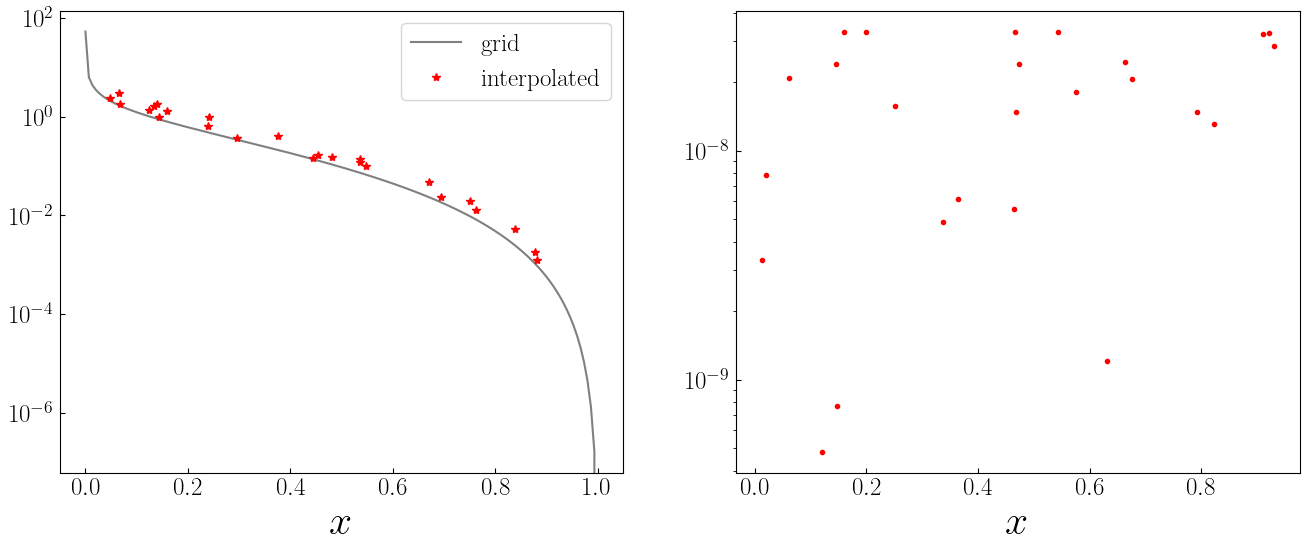

In [363]:
nrows,ncols = 1,2
py.figure(figsize=(8*ncols,6*nrows))

ax=py.subplot(nrows,ncols,1)
ax.plot(x_vals,ff3_bt_x(x_vals,torch.tensor(1)),'gray',label=r'$\rm grid$')
ax.plot(x_rand,akima_vals,'r*',label=r'$\rm interpolated$')
#ax.plot(xrand,tru_vals,'bs',label=r'$\rm true$')

ax.semilogy()

ax.tick_params(direction='in',labelsize=18)
ax.legend(fontsize=18)
ax.set_xlabel(r'$x$',size=30)

ax=py.subplot(nrows,ncols,2)
ax.plot(xrand,torch.abs(int_vals-tru_vals)/tru_vals,'r.')
# ax.semilogx()
ax.semilogy()

ax.tick_params(direction='in',labelsize=18)
ax.set_xlabel(r'$x$',size=30)